In [1]:
%reset
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import datetime
from tsf_bmw.uvtsf import UVariateTimeSeriesForecaster
from tsf_bmw.tools import moving_linreg
from plotly.plotly import plot_mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
%matplotlib inline
from random import sample

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<Figure size 640x480 with 1 Axes>

##### Read in the data

In [2]:
try:
    ts_univ = pd.read_pickle( '../data/pos_h.pkl' )
    print ( "====================================\nData: data of shape " + str(ts_univ.shape) + " has been read in." ) 
except IOError as e:
    print("Could not read in the data: {}".format(e))

Data: data of shape (705, 1) has been read in.


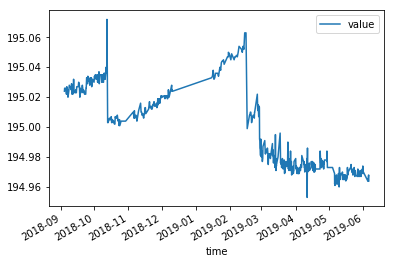

In [3]:
ts_univ.plot()

##### Create UVariateTimeSeriesForecaster

No transformation.
Using time series data of range: 2018-09-04 08:00:00 - 2019-06-05 21:00:00 and shape: (705, 1)
The object is initialized!
Timse series resampled at frequency: <Hour>. New shape of data: (6590, 1)


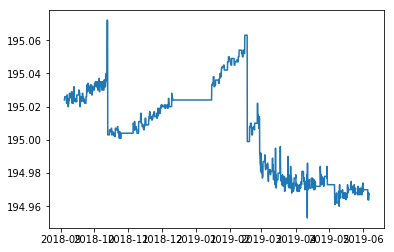

In [4]:
uv_tsf = UVariateTimeSeriesForecaster(dict({'ts_df':ts_univ, 'time_format': "%Y-%m-%d %H:%M:%S", 'freq':'H', 'transform': '', 'p_train':1.0}))
uv_tsf.ts_resample()
plt.plot(uv_tsf.ts_df)

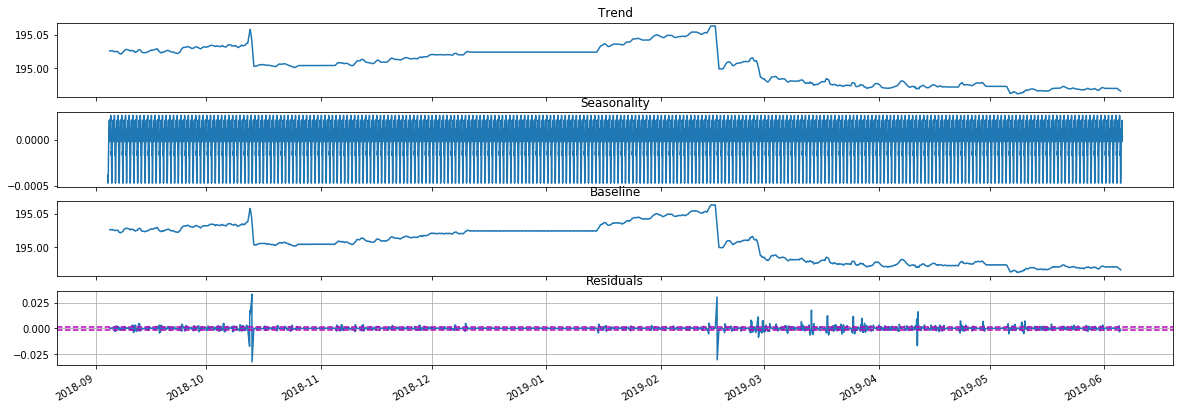

In [5]:
#uv_tsf.ts_decompose(params=dict({'model':'additive'}))
uv_tsf.plot_decompose()

Starting moving linreg....
moving linreg done!


NameError: name 'qxes' is not defined

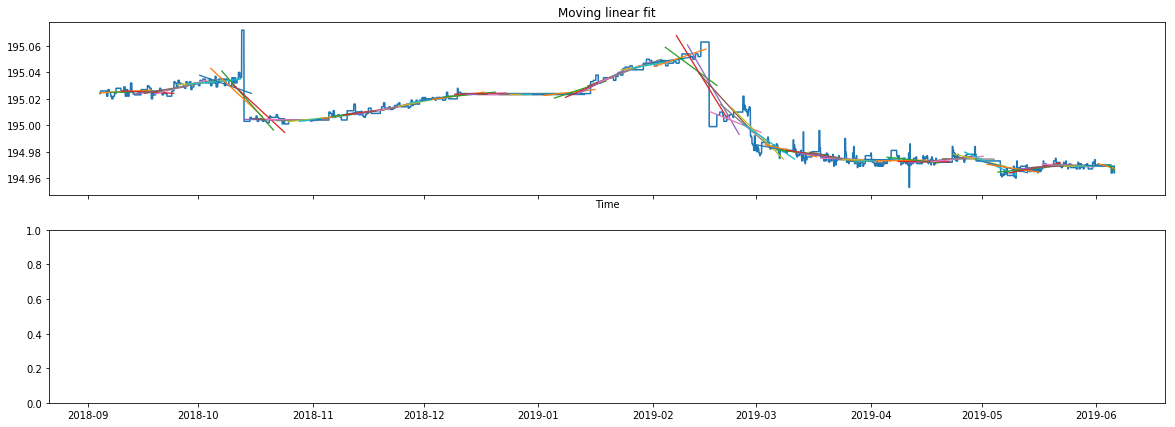

In [6]:
fittedvalues, slopes = moving_linreg(uvtsf_obj=uv_tsf, hist='2W', step='3D')

In [ ]:
method='auto_arima'
dict_params = dict()
dict_params = {
    'd': 0,
}

In [ ]:
method = 'prophet'
dict_params = {
    'interval_width': 0.95,
    'yearly_seasonality': False,
    'weekly_seasonality': False,
    'daily_seasonality': False,
    'weekend_seasonality': False,
    'changepoint_prior_scale': 0.001
}

In [ ]:
if len(dict_params):
    uv_tsf.ts_fit ( method=method, dict_params=dict_params ) 
else:
    uv_tsf.ts_fit ( method=method ) 

In [ ]:
uv_tsf.diagnose()

In [ ]:
uv_tsf.plot_residuals()

In [ ]:
uv_tsf.ts_test()

In [ ]:
uv_tsf.ts_forecast(n_forecast = 3*24)